In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display #lets you show more than one df
import os
import multiprocessing as mp
from scipy.optimize import curve_fit
import time


In [2]:
dataDir = 'LCPB/data/'

#Accretion Efficacy directories
AccEff_values = list(np.arange(0.05, 1.05, 0.05))
AccEff_dir = ['vnew_delayed_fMT0'+str(x)[2:] for x in np.round((np.arange(19)+1)*0.05,3)] 
AccEff_dir = list(np.append(AccEff_dir,'vnew_delayed_fMT01'))

#Common Envelope directories
CommEnv_values = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
CommEnv_dir = ['A'+str(x) for x in CommEnv_values]

#Metallicity Z filenames (11 BHBs - 11 BHNS - 11 DNSs)
Z_values = [0.0002,0.0004,0.0008,0.0012,0.0016,0.002,0.004,0.006,0.008,0.012,0.016]
Met_dir = ['data_BHBs_'+str(x) for x in Z_values]

print(AccEff_dir, '\n')
print(CommEnv_dir, '\n')
print(Met_dir)

['vnew_delayed_fMT005', 'vnew_delayed_fMT01', 'vnew_delayed_fMT015', 'vnew_delayed_fMT02', 'vnew_delayed_fMT025', 'vnew_delayed_fMT03', 'vnew_delayed_fMT035', 'vnew_delayed_fMT04', 'vnew_delayed_fMT045', 'vnew_delayed_fMT05', 'vnew_delayed_fMT055', 'vnew_delayed_fMT06', 'vnew_delayed_fMT065', 'vnew_delayed_fMT07', 'vnew_delayed_fMT075', 'vnew_delayed_fMT08', 'vnew_delayed_fMT085', 'vnew_delayed_fMT09', 'vnew_delayed_fMT095', 'vnew_delayed_fMT01'] 

['A0.5', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'] 

['data_BHBs_0.0002', 'data_BHBs_0.0004', 'data_BHBs_0.0008', 'data_BHBs_0.0012', 'data_BHBs_0.0016', 'data_BHBs_0.002', 'data_BHBs_0.004', 'data_BHBs_0.006', 'data_BHBs_0.008', 'data_BHBs_0.012', 'data_BHBs_0.016']


Loading the file 'LCPB/data//vnew_delayed_fMT005/A0.5/data_BHBs_0.0002.txt'

In [3]:
path = dataDir +'/'+ AccEff_dir[3] +'/'+ CommEnv_dir[3] +'/'+ Met_dir[3] + '.txt'
print(path)
args = ['id','initial_mass_1','initial_mass_2',
        'mass_cObj_1','mass_cObj_2','tot_mass_cObj',
        'delay_time','smaj_axis','eccentricity']
df = pd.read_csv(path, sep=" ", names=args, skiprows=1)
df

LCPB/data//vnew_delayed_fMT02/A3/data_BHBs_0.0012.txt


,id,initial_mass_1,initial_mass_2,mass_cObj_1,mass_cObj_2,tot_mass_cObj,delay_time,smaj_axis,eccentricity
0,2,29.8442,23.5476,5.4031,4.1312,9.5343,0.286664,5.0321,0.379690
1,3,41.6608,39.0897,14.3454,14.4442,28.7896,1.577842,15.5550,0.017367
2,5,27.9337,22.5970,5.4151,3.8140,9.2291,0.678385,6.3655,0.429610
3,11,50.9124,30.3059,12.5917,9.3931,21.9848,11.531803,21.2680,0.135430
4,13,33.3750,29.6915,8.3592,7.5010,15.8602,1.001213,9.3479,0.240160
...,...,...,...,...,...,...,...,...,...
47037,27076,40.2454,37.7955,13.4994,13.4231,26.9225,1.322187,14.1640,0.037489
47038,27077,44.5795,42.5022,15.1054,16.0596,31.1650,2.313599,18.1640,0.016044
47039,27079,38.6397,34.3717,12.1399,10.9351,23.0750,1.272958,12.5420,0.078981
47040,27083,46.6682,30.1825,10.8369,8.5234,19.3603,0.484830,8.7969,0.180100


<function matplotlib.pyplot.show(close=None, block=None)>

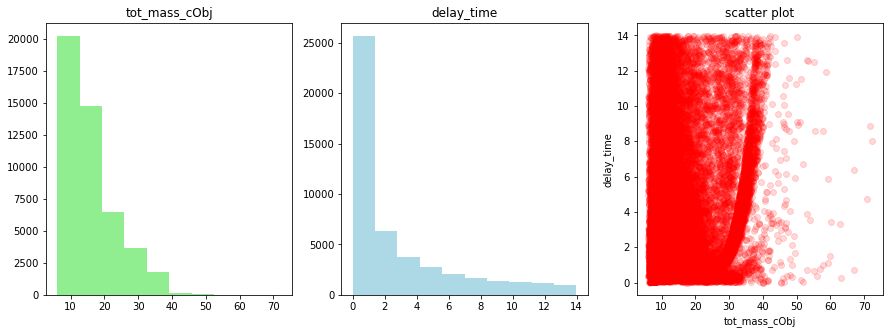

In [4]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].hist(df['tot_mass_cObj'], color='lightgreen')
ax[0].set_title('tot_mass_cObj')
ax[1].hist(df['delay_time'], color='lightblue')
ax[1].set_title('delay_time')
ax[2].scatter(df['tot_mass_cObj'],df['delay_time'], color='red', alpha=0.15)
ax[2].set_title('scatter plot'), ax[2].set_ylabel('delay_time'), ax[2].set_xlabel('tot_mass_cObj')
plt.show

In [5]:
data = pd.DataFrame(columns=[*args,'AccretionEfficiency','CommonEnvelope','Z'])
time_analysis = []
for (i,AccretionEfficiency) in zip(range(len(AccEff_dir[:2])),AccEff_dir[:2]):
    for (j,CommonEnvelope) in zip(range(len(CommEnv_dir[:2])),CommEnv_dir[:2]):
        for (k,Metallicity) in zip(range(len(Met_dir)),Met_dir):
            start_time = time.time()
            filename = dataDir +'/'+ AccretionEfficiency +'/'+ CommonEnvelope +'/'+ Metallicity + '.txt'
            data_file = pd.read_csv(filename, sep=" ", names=args, skiprows=1)
            data_file['AccretionEfficiency'] = AccEff_values[i]
            data_file['CommonEnvelope'] = CommEnv_values[i]
            data_file['Z'] = Z_values[i]
            data = pd.concat([data, data_file], ignore_index=True)
#         print('NEW COMMON ENVELOPE \n')
        time_analysis = [*time_analysis, (time.time() - start_time)]
#         print('-----seconds : ', (time.time() - start_time))
    print("NEW ACCRETION EFFICIENCY \n")

NEW ACCRETION EFFICIENCY 

NEW ACCRETION EFFICIENCY 



first 2 AE, first 2 CommEnv (all Z) sub-dataset

In [6]:
if list(data.columns).count('mass_ratio')==0:
    data['mass_ratio'] = data['initial_mass_1']/data['initial_mass_2']
else:
    pass

data

,id,initial_mass_1,initial_mass_2,mass_cObj_1,mass_cObj_2,tot_mass_cObj,delay_time,smaj_axis,eccentricity,AccretionEfficiency,CommonEnvelope,Z,mass_ratio
0,1,54.3396,52.083,22.1118,20.4424,42.5542,0.008093,4.4282,0.01175,0.05,0.5,0.0002,1.043327
1,5,58.9754,55.9686,24.3563,22.2701,46.6264,0.010175,5.4175,0.010724,0.05,0.5,0.0002,1.053723
2,9,96.3555,84.2747,38.3529,34.0211,72.374,0.272228,19.971,0.045441,0.05,0.5,0.0002,1.14335
3,10,61.2173,58.7969,25.2146,23.5961,48.8107,0.008453,5.1401,0.010244,0.05,0.5,0.0002,1.041165
4,11,51.974,48.2456,21.6566,18.5773,40.2339,0.04459,8.9334,0.35215,0.05,0.5,0.0002,1.07728
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832158,5066,36.5611,36.439,3.0632,3.2817,6.3449,6.013211,140.86,0.98581,0.1,1,0.0004,1.003351
832159,5439,56.2765,49.2573,6.715,5.699,12.414,0.137478,139.12,0.99326,0.1,1,0.0004,1.142501
832160,5738,37.8959,37.0216,4.0467,3.55,7.5967,0.13263,232.05,0.99781,0.1,1,0.0004,1.023616
832161,5868,36.1887,32.0602,8.3646,3.6953,12.0599,0.01075,79.897,0.99564,0.1,1,0.0004,1.128773


#### PCA Analysis

In [7]:
def perform_PCA(data, n_components, scaling_method='Standardization', plots='yes'):
    # in data there has to be the 'delay_time' column
    
    # importing functions
    from sklearn.preprocessing import StandardScaler
    from sklearn import preprocessing
    from sklearn.decomposition import PCA
    
    # removing 'delay_time' label
    data_OF = data.drop(columns=['delay_time'])  # Only Features; remove_label='name of the feature to remove'
    
    # scaling
    if scaling_method=='Standardization':
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(data_OF)
        data_OF_scaled = pd.DataFrame(X_scaled, columns=data_OF.columns)
    elif scaling_method=='Normalization':
        data_OF_scaled = preprocessing.normalize(data_OF)
    
    # PCA 
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(data_OF_scaled)
    pcs = []
    for i in range(n_components):
        pcs = [*pcs, 'PC'+str(i+1)]
    data_OF_pca = pd.DataFrame(X_pca, columns=pcs)
    
    # merging with 'delay_time' column
    data_PCA = pd.concat([data_OF_pca, data['delay_time']], axis=1)
    data_PCA
    
    # plotting "PComponents vs delay time" and "PC histograms"
    colors = ['red', 'skyblue', 'green', 'orange']        # colors
    fig, ax = plt.subplots(2,n_components, figsize=(4.5*n_components,9))
    for j in range(n_components):
        ax[0,j].scatter(data_PCA['PC'+str(j+1)], data_PCA['delay_time'], c=colors[j], alpha=0.2)
        ax[0,j].set_title('PC'+str(j+1)+' vs delay time')
    for j in range(n_components):
        ax[1,j].hist(data_PCA['PC'+str(j+1)], color=colors[j])
        ax[1,j].set_title('PC'+str(j+1)+' frequencies')
    plt.show()
    print(data_PCA.head())
    return data_PCA

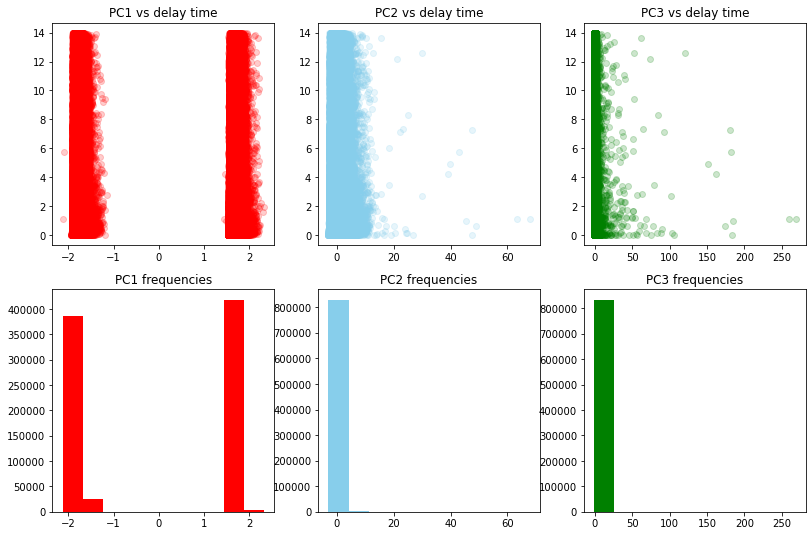

        PC1       PC2       PC3 delay_time
0 -1.812756 -0.994111  0.319057   0.008093
1 -1.821457 -1.111444  0.428133   0.010175
2 -1.873841 -1.789779  1.148095   0.272228
3 -1.828136 -1.219423  0.476510   0.008453
4 -1.803384 -0.826308  0.286895    0.04459


In [8]:
data_filt = data.drop(columns=['id', 'initial_mass_1', 'initial_mass_2', 'mass_cObj_1', 'mass_cObj_2', 'eccentricity'])
data_filt
pca_df = perform_PCA(data_filt,3)